In [433]:
import traceback
import random
import gym
from gym.envs.registration import register
#del gym.registry.env_specs["Qwixx-v0"]
import matplotlib.pyplot as plt
from multiprocessing import Pool
import math
import numpy as np

import gym_qwixx
from gym_qwixx.envs.qwixx_env import QwixxEnv
import qwixx_agent_random
from qwixx_agent_random import QwixxAgentRandom
import qwixx_agent_mcts
from qwixx_agent_mcts import QwixxAgentMCTS
import qwixx_game_performer
from qwixx_game_performer import QwixxGamePerformer


import importlib
importlib.reload(gym_qwixx.envs.qwixx_env)
importlib.reload(qwixx_agent_random)
importlib.reload(qwixx_agent_mcts)
importlib.reload(qwixx_game_performer)


id = random.randint(0, 100000)

register(
    id='Qwixx-v' + str(id),
    entry_point='gym_qwixx.envs.qwixx_env:QwixxEnv',
)

env = gym.make('Qwixx-v' + str(id))



In [338]:
# Debug methods


temp = QwixxEnv()
diceThrow = temp.get_throw_all_dice()
#diceThrow = {'white1': 6, 'white2': 6, 'red': 3, 'yellow': 3, 'green': 1, 'blue': 4}
diceThrow = {'white1': 6, 'white2': 2, 'red': 1, 'yellow': 3, 'green': 5, 'blue': 3}
display(diceThrow)

observation = temp.reset()
#print(observation)

temp.get_state()[0][0][5] = 1
temp.get_state()[0][1][10] = 1
temp.get_state()[1][1][0] = 1  # Player 2 has closed yellow
temp.get_state()[1][1][1] = 1  # Player 2 has closed yellow
temp.get_state()[1][1][2] = 1  # Player 2 has closed yellow
temp.get_state()[1][1][3] = 1  # Player 2 has closed yellow
temp.get_state()[1][1][10] = 1  # Player 2 has closed yellow
display(temp.get_state())
temp.set_turn_number(10)

print("Available actions p1:")
availableActionsP1 = temp.get_available_actions(diceThrow, 0)
display(availableActionsP1)

print("Available actions p2:")
availableActionsP2 = temp.get_available_actions(diceThrow, 1)
#display(availableActionsP2)

#print("points calculation:")
#print(temp._get_points_color_row(1, 5, 1))

print("Points p1: " + str(temp.get_points(0)))
print("Points p2: " + str(temp.get_points(1)))

clone = temp.clone()
clone.get_state()[0][0][0] = 1
print("Clone turn number: " + str(clone.turnNumber))


print("Clone state (after changing clone state)")
display(clone.get_state())
print("Original state (after changing clone state)")
display(temp.get_state())

{'white1': 6, 'white2': 2, 'red': 1, 'yellow': 3, 'green': 5, 'blue': 3}

[[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])]]

Available actions p1:


[((0, 6), (2, 9)),
 ((0, 6), (2, 5)),
 ((0, 6), (3, 7)),
 ((0, 6), (3, 3)),
 ((0, 6), None),
 ((2, 6), (2, 9)),
 ((2, 6), (3, 7)),
 ((2, 6), (3, 3)),
 ((2, 6), None),
 ((3, 6), (2, 9)),
 ((3, 6), (2, 5)),
 ((3, 6), (3, 7)),
 ((3, 6), None),
 (None, (2, 9)),
 (None, (2, 5)),
 (None, (3, 7)),
 (None, (3, 3)),
 ((4, 0), None)]

Available actions p2:
Points p1: 2.0
Points p2: 21.0
Clone turn number: 10
Clone state (after changing clone state)


[[array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])]]

Original state (after changing clone state)


[[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0.])]]

In [467]:
def performGames(nGamesParam, numberPlayersParam):
    pointResults = []
    for gameIndex in range(nGamesParam):
        #gamePerformer = QwixxGamePerformer(numberPlayersParam, agents=[QwixxAgentMCTS(0), QwixxAgentRandom(1)])
        gamePerformer = QwixxGamePerformer(numberPlayersParam, agents=[QwixxAgentRandom(0), QwixxAgentMCTS(1)])
        #gamePerformer = QwixxGamePerformer(numberPlayersParam, agents=[QwixxAgentRandom(0), QwixxAgentRandom(1)])
        #gamePerformer = QwixxGamePerformer(numberPlayersParam, agents=[QwixxAgentMCTS(0), QwixxAgentMCTS(1)])
        
        result = gamePerformer.perform_complete_game()

        pointResults.append(result)

        if gameIndex % 100 == 0:
            print("At gameIndex=" + str(gameIndex) + "...")
    
    if nGamesParam==1:
        display(gamePerformer.env.get_state())
    
    return pointResults

In [468]:
performGames(1, 2)

At gameIndex=0...


[[array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
  array([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]),
  array([1., 1., 0., 0.])],
 [array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]),
  array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
  array([1., 1., 0., 0.])]]

[[41.0, 22.0]]

In [469]:
nProcesses = 8
pool = Pool(nProcesses)


numberPlayers = 2

nGames = 1000
nGamesPerProcess = math.ceil(nGames / nProcesses)
print("Performing " + str(nGamesPerProcess) + " games per process..")




#results = pool.map(performGames, [nGamesPerProcess, agents])


asyncResults = [pool.apply_async(performGames, [nGamesPerProcess, numberPlayers])
                    for processIndex in range(nProcesses)]


pointResults = []
for processIndex in range(nProcesses):
    pointResultsProcess = asyncResults[processIndex].get()
    for i in range(len(pointResultsProcess)):
        pointResults.append(pointResultsProcess[i])


print("Done. len(pointResults)=" + str(len(pointResults)))



Performing 125 games per process..
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=0...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
At gameIndex=100...
Done. len(pointResults)=1000


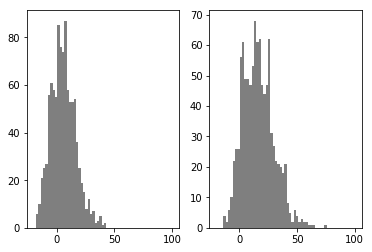

[243, 723]

-10.65

In [470]:

pointResultsPerPlayer = []
for playerIndex in range(numberPlayers):
    pointResultsThisPlayer = [gameResult[playerIndex] for gameResult in pointResults]
    pointResultsPerPlayer.append(pointResultsThisPlayer)

#display(pointResultsPerPlayer)

bins = np.linspace(-20, 100, 60)

fig, ax = plt.subplots(1, numberPlayers)
for playerIndex in range(numberPlayers):
    ax[playerIndex].hist(pointResultsPerPlayer[playerIndex], bins, alpha=0.5, color="black")

plt.show()


# Number of wins 
numWinsPerPlayer = []
for playerIndex in range(numberPlayers):
    numWins = 0
    for gameIndex in range(nGames):
        # If player has the most points (uniquely, not counting draws)
        gameResult = pointResults[gameIndex]
        if gameResult[playerIndex] == max(gameResult) and gameResult.count(max(gameResult))==1:
            numWins += 1
    numWinsPerPlayer.append(numWins)

    
display(numWinsPerPlayer)

# Average distance
distances = [  ]
for gameIndex in range(nGames):
    distances.append(pointResults[gameIndex][0] - pointResults[gameIndex][1])

display(np.mean(distances))


In [ ]:
# Actual learning

for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        #env.render()
        print(observation)
        action = env.action_space.sample() # perform exploration vs exploitation here
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

In [ ]:
import gym
env = gym.make('CartPole-v0')
env.reset()
env.render()

In [ ]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
space.
x = space.sample()
print(x)
print(space)
print(space.contains(5))

In [ ]:
for i in range(10):
    print(i)
    
temp = [(1, 2), (2, 3)]

print(temp[0][0])

In [ ]:
temp = [ [np.zeros(11) for i in range(4)] for playerIndex in range(2) ]

#player, row, field inex
temp[0].append(np.zeros(4))
temp



In [ ]:
result = []
result[2] = np.zeros(5)

np.argmax

In [ ]:
temp = np.zeros(4)
temp[0] = 1
temp[1] = 1
temp = [1 for i in range(4)]
# should return index=2
sum(temp)
print(temp)

In [88]:
([1, 2, 3, 3]).count(3)

2

In [450]:
np.mean([1, 2, 3])

2.0